# OpenABM-Covid19 - Example Self-Isolation on Symptoms

This examples show how to run a simulation on 50k people and demonstrates the effect in the reduciton in incidence which occurs when people and their household self-isolate on symptoms.

First we intiailize the model using baseline paramters and a population of 50k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

model = abm( params = { "n_total" : 50000, "end_time" : 40 })

Now we run for 40 days.

In [2]:
model.run( verbose = False )
timeseries = model.results

We now run a new simulation from scratch for 20 days (same seed and initial parameters).

In [3]:
del( model )
model = abm( params = { "n_total" : 50000, "end_time" : 40 })
for t in range( 20 ) :
    model.one_time_step()

At day 20 we introduce self-quarantine of 80% those who are sypmtomatic and quarantine all members of their household.

In [4]:
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
model.run( verbose = False )

Plot the number of daily new infections over the course of the simulation ad compare between with and without self-isolation.

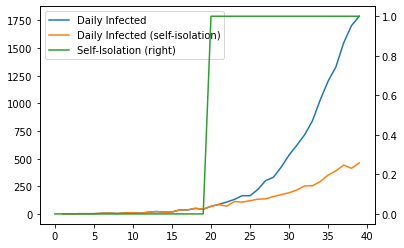

In [5]:
timeseries2 = model.results
timeseries["daily_infected"] = timeseries["total_infected"].diff(1)
timeseries2["daily_infected_sd"] = timeseries2["total_infected"].diff(1)
df = pd.merge( timeseries, timeseries2, on = "time")
df["self_isolate"] = timeseries.apply(lambda X: 1 if ( X.time >20) & ( X.time <= 40 ) else 0, axis=1)

plt.figure()
df.daily_infected.plot( x = "time", legend = True, label = "Daily Infected" )
df.daily_infected_sd.plot( x = "time", legend = True, label = "Daily Infected (self-isolation)" )
df.self_isolate.plot( x = "time", legend = "True", secondary_y = True, label = "Self-Isolation" )